In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage as ndi
from skimage import io
from skimage.color import rgb2gray
from operator import itemgetter
from numpy.linalg import norm
from scipy.spatial import distance

ktory = 0

In [2]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()
    
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

rome1.jpg


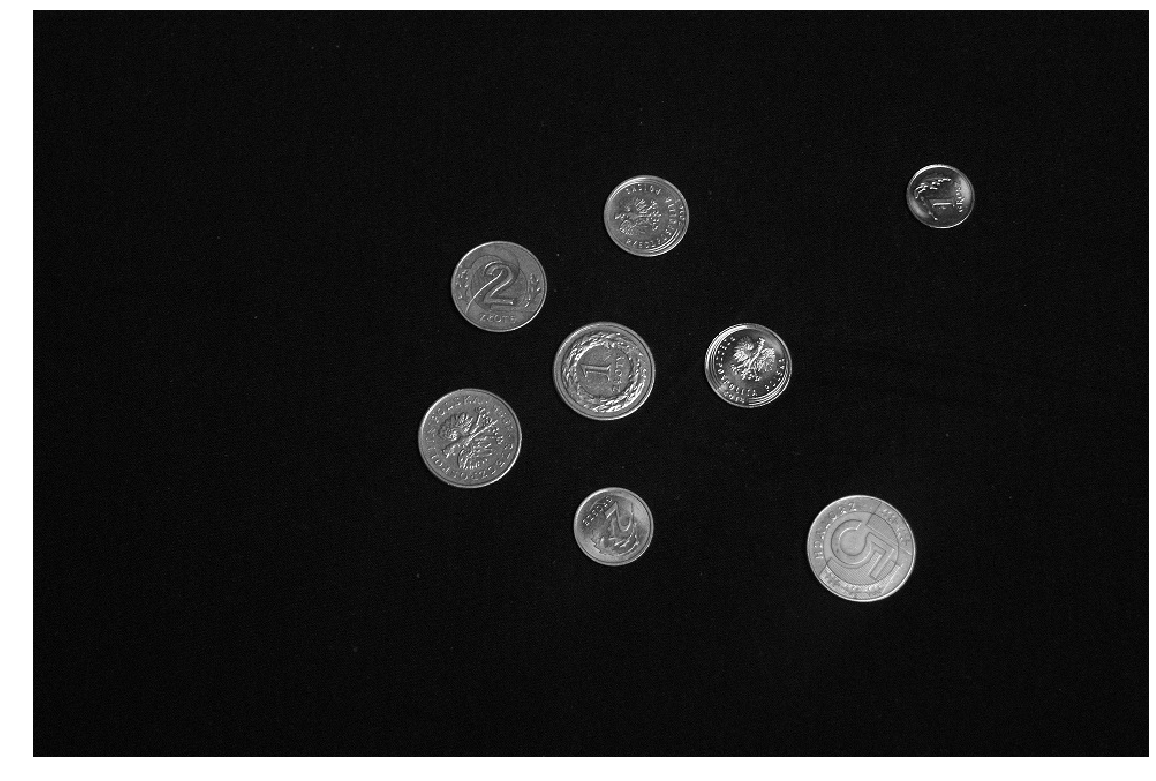

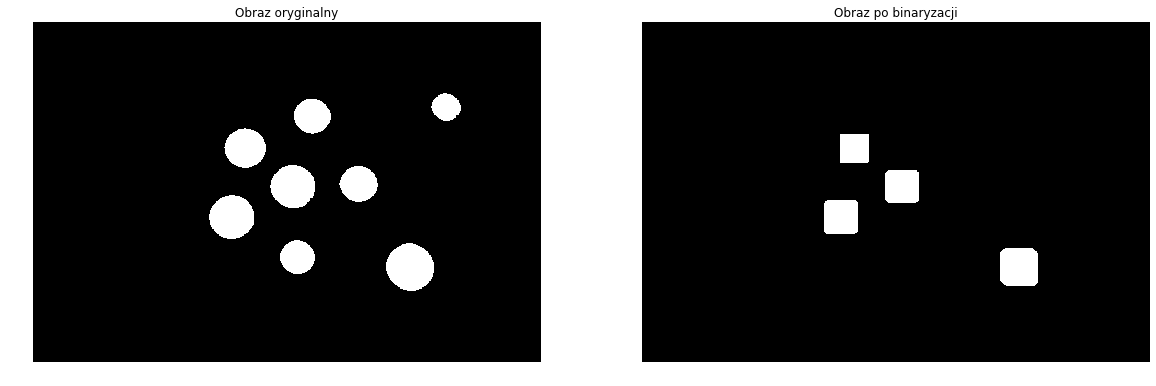

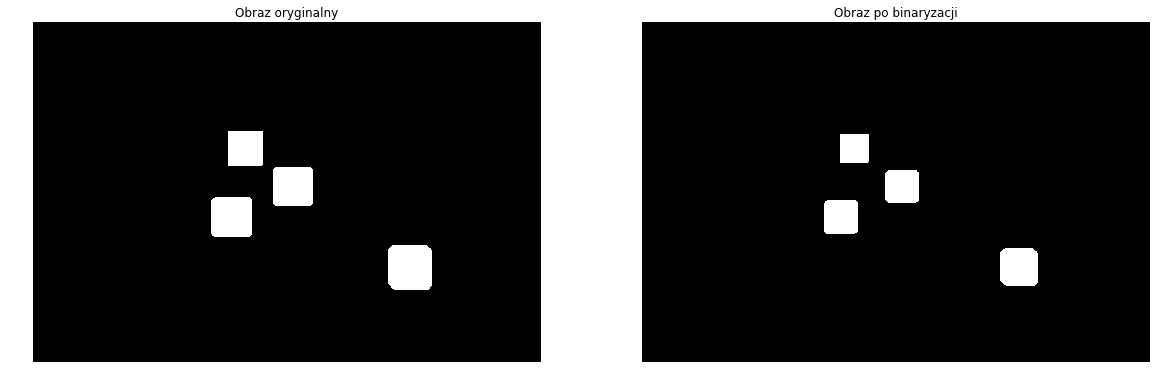

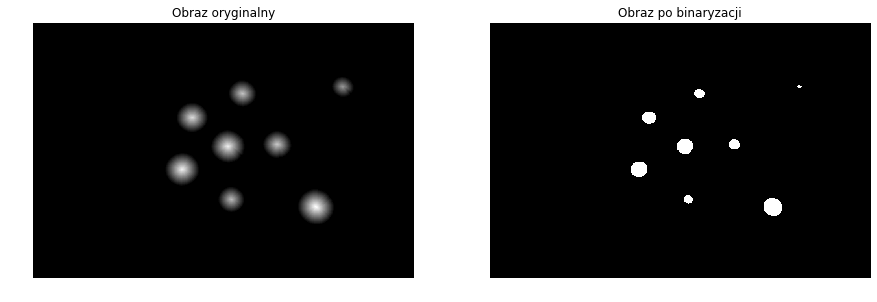

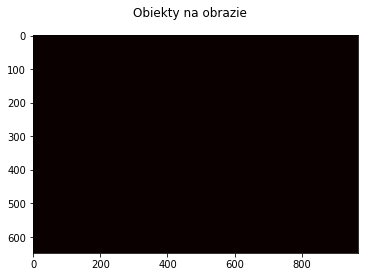

(648, 968)
(648, 968)
8


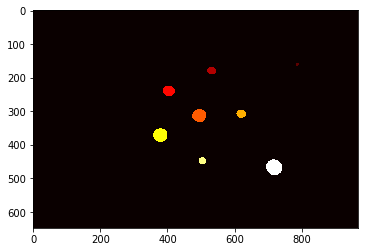

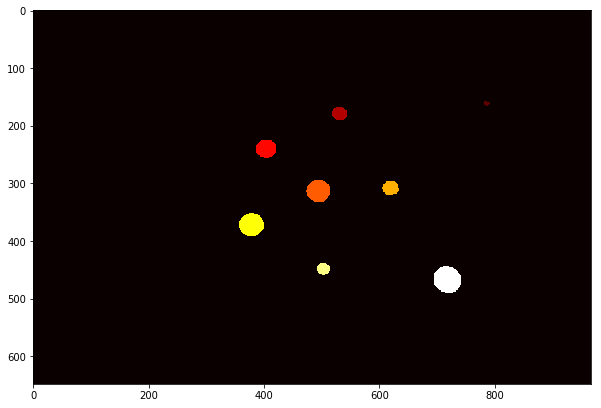

Liczba punktow:  66 
Srodek ciezkosci:  [161.3939393939394, 786.1515151515151] 
Blair-Bliss:  0.977041911632478 
Feret:  0.7 
---

Liczba punktow:  479 
Srodek ciezkosci:  [178.7160751565762, 531.6200417536535] 
Blair-Bliss:  0.9940620130369623 
Feret:  0.88 
---

Liczba punktow:  893 
Srodek ciezkosci:  [239.86338185890259, 403.97536394176933] 
Blair-Bliss:  0.9958234376926464 
Feret:  0.8823529411764706 
---

Liczba punktow:  1258 
Srodek ciezkosci:  [313.0453100158982, 494.84419713831477] 
Blair-Bliss:  0.9977268685119387 
Feret:  0.926829268292683 
---

Liczba punktow:  565 
Srodek ciezkosci:  [308.0477876106195, 620.0849557522124] 
Blair-Bliss:  0.9945979565040437 
Feret:  0.8571428571428571 
---

Liczba punktow:  1342 
Srodek ciezkosci:  [371.354694485842, 378.5275707898659] 
Blair-Bliss:  0.9984106023106503 
Feret:  0.9512195121951219 
---

Liczba punktow:  374 
Srodek ciezkosci:  [447.89572192513367, 503.43048128342247] 
Blair-Bliss:  0.997746633157509 
Feret:  0.95238095238095

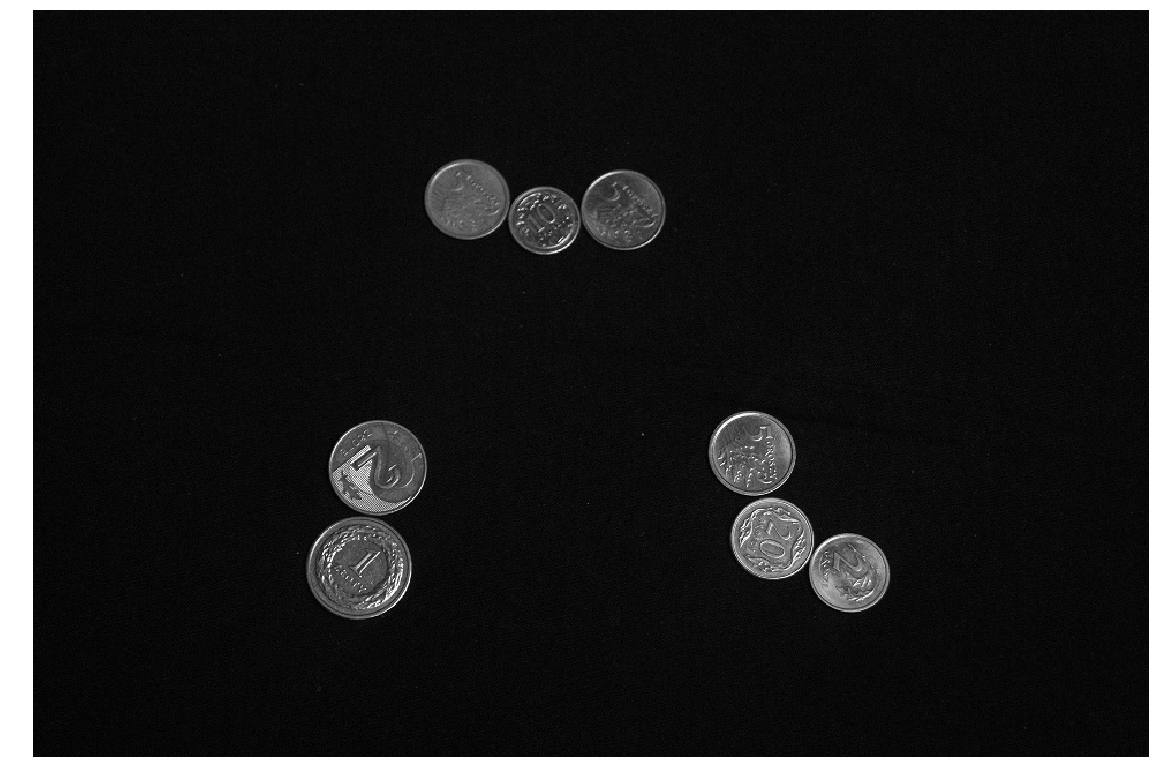

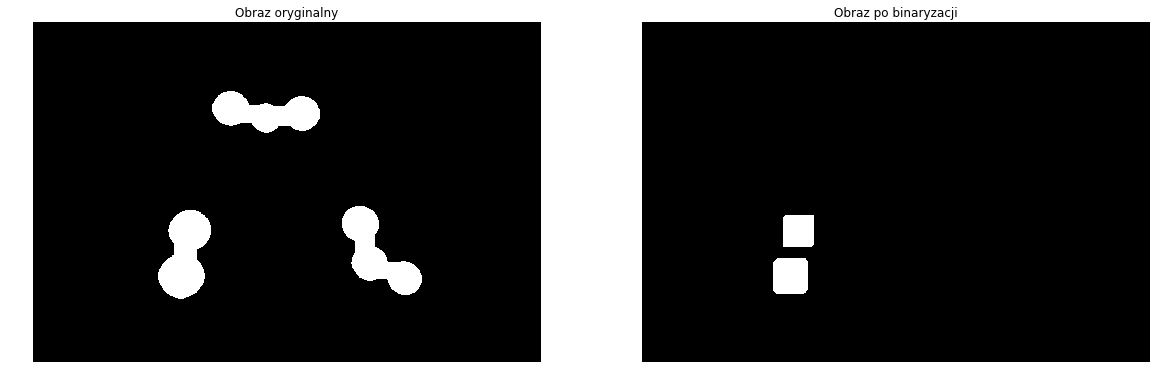

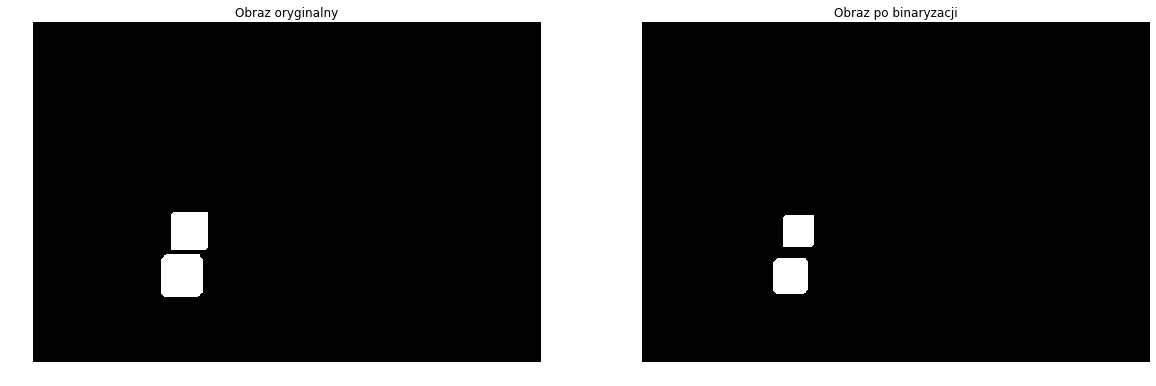

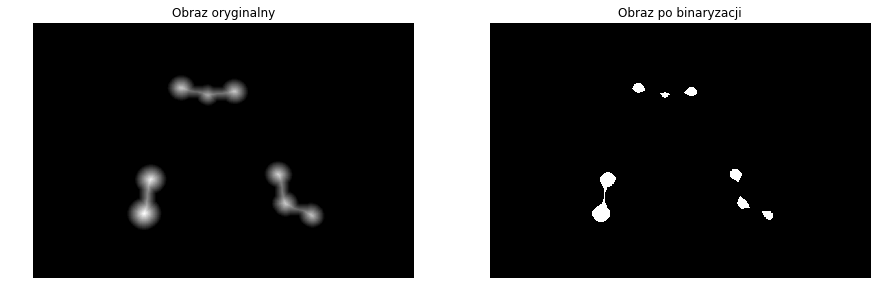

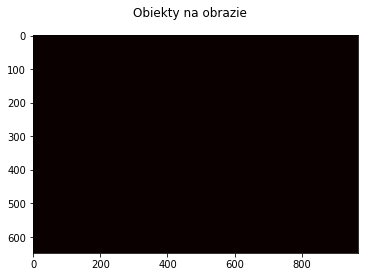

(648, 968)
(648, 968)
7


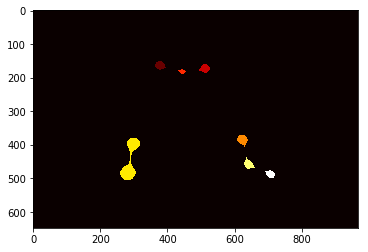

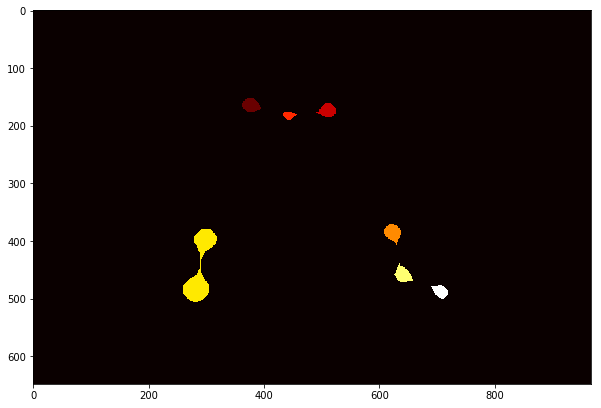

Liczba punktow:  577 
Srodek ciezkosci:  [164.76603119584055, 377.59098786828423] 
Blair-Bliss:  0.9718366485110217 
Feret:  0.696969696969697 
---

Liczba punktow:  563 
Srodek ciezkosci:  [173.78507992895203, 510.69094138543517] 
Blair-Bliss:  0.9699517287105391 
Feret:  0.6764705882352942 
---

Liczba punktow:  214 
Srodek ciezkosci:  [181.99065420560748, 443.67289719626166] 
Blair-Bliss:  0.9194812932797637 
Feret:  0.5416666666666666 
---

Liczba punktow:  694 
Srodek ciezkosci:  [385.6556195965418, 623.8472622478387] 
Blair-Bliss:  0.9762457230414541 
Feret:  1.2413793103448276 
---

Liczba punktow:  2967 
Srodek ciezkosci:  [446.2551398719245, 289.3963599595551] 
Blair-Bliss:  0.49374758342752423 
Feret:  2.1724137931034484 
---

Liczba punktow:  625 
Srodek ciezkosci:  [457.9328, 641.4512] 
Blair-Bliss:  0.9532044180424062 
Feret:  1.03125 
---

Liczba punktow:  456 
Srodek ciezkosci:  [487.3881578947368, 706.4978070175439] 
Blair-Bliss:  0.9601208628291337 
Feret:  0.785714285

In [ ]:
while ktory < 15:
    ktory += 1
    zdjecie = 'rome' + str(ktory) + '.jpg'
    print(zdjecie)

    im = cv2.imread(zdjecie,0)

    plt.figure(figsize=(20,20))
    plt.imshow(im, cmap="gray")
    plt.axis('off')
    plt.show()
    
    
    kernel = np.ones((5,5),np.uint8)
    th = 20

    th, bim = cv2.threshold(im, thresh=th, maxval=255, type=cv2.THRESH_BINARY)

    mbim2 = cv2.erode(bim, kernel=kernel, iterations=1)


    closing = cv2.morphologyEx(mbim2, op=cv2.MORPH_CLOSE, kernel=kernel, iterations=5)
    opening = cv2.morphologyEx(closing, op=cv2.MORPH_OPEN, kernel=kernel, iterations=13)


    show2imgs(closing, opening, title1='Obraz oryginalny', title2='Obraz po binaryzacji', size=(20,20))
    
    
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    show2imgs(sure_bg, opening, title1='Obraz oryginalny', title2='Obraz po binaryzacji', size=(20,20))

    # Finding sure foreground area


    dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2,3)
    ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)



    show2imgs(dist_transform, sure_fg, title1='Obraz oryginalny', title2='Obraz po binaryzacji', size=(15,15))



    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    
    label_objects, nb_labels = ndi.label(sure_fg)

    sizes = np.bincount(sure_fg.ravel())
    mask_sizes = sizes > 20
    mask_sizes[0] = 0

    figures = mask_sizes[label_objects]

    plt.imshow(figures, cmap="hot")
    plt.axis('on')
    plt.suptitle('Obiekty na obrazie')
    plt.show()

    print(figures.shape)
    print(label_objects.shape)
    print(nb_labels)

    plt.imshow(label_objects,cmap='hot')
    plt.show()
    
    no_of_object = 2

    def cog(labelledImage, objNumber):
        cx = 0
        cy = 0
        for y in range(labelledImage.shape[0]):
            for x in range(labelledImage.shape[1]):
                if labelledImage[y,x] == objNumber:
                    cy = cy + y
                    cx = cx + x

        cx = cx / sizes[objNumber]
        cy = cy / sizes[objNumber]

        return int(cy), int(cx)

    cogs = []
    
    def drawMarkers(image, coords):

        image = np.copy(image)

        for item in coords:
            y,x = item
            for j in range(y-5, y+6):
                image[j,x] = 0
            for i in range(x-5, x+6):
                image[y,i] = 0

        return image


    lo = drawMarkers(label_objects, cogs)
    plt.figure(figsize=(10,10))
    plt.imshow(lo,cmap='hot')
    plt.show()
    
    
    cogs3 = sorted(cogs, key=lambda tup: norm(tup))
    #print(cogs3)

    #for item in cogs3:
    #    print(norm(item))

    import math

    p1 = 0
    p2 = 1



    def getFigure(labelledImage, objNumber):

        points = []
        for y in range(labelledImage.shape[0]):
            for x in range(labelledImage.shape[1]):
                if labelledImage[y,x] == objNumber:
                    points.append((y,x))

        return points

    def cog2(points):
        mx=0
        my=0
        for (y,x) in points:
            mx = mx + x
            my = my + y
        mx = mx/len(points)
        my = my/len(points)

        return [my, mx]


    def computeBB(points):

        s = len(points)
        my,mx = cog2(pts)

        r = 0
        for point in points:
            r = r + distance.euclidean(point,(my,mx))**2

        return s/(math.sqrt(2*math.pi*r))



    def computeFeret(points):

        px = [x for (y,x) in points]
        py = [y for (y,x) in points]

        fx = max(px) - min(px)
        fy = max(py) - min(py)

        return float(fy)/float(fx)    

    for i in range(nb_labels):
        pts = getFigure(label_objects, i+1)
        bb = computeBB(pts)
        feret = computeFeret(pts)

        print('Liczba punktow: ',len(pts),'\nSrodek ciezkosci: ', cog2(pts),'\nBlair-Bliss: ', bb,'\nFeret: ',feret, '\n---\n')

    # Marker labelling


    ret, markers = cv2.connectedComponents(sure_fg)
    ret -= 1
    r = ret % 10

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    im = cv2.imread(zdjecie,1)

    markers = cv2.watershed(im,markers)
    im[markers == -1] = [255,0,0]





    if r > 1 and r < 5:
        print("Na zdjęciu jest: " + str(ret) + " obiekty")
    else:
        print("Na zdjęciu jest: " + str(ret) + " obiektow")
        
    print('==============================')
        